In [1]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from scipy.io import loadmat

from xyztools import xyz2grid, xyz2grd

In [2]:
# Genera colormap para agua y tierra
c_agua=plt.cm.Blues_r(np.linspace(0,0.75,256))
c_terr=plt.cm.gist_earth(np.linspace(0.5,1,256))
cols = np.vstack((c_agua, c_terr))
terreno=cm.colors.LinearSegmentedColormap.from_list("terreno", cols)

### Genera bati .grd desde un archivo.mat

In [3]:
#archivo .mat
mat_file=r"G:\My Drive\UTFSM\memoria\batimetrias\bat_IV_region\bat_l2_iv_region_3sa.mat"
mat_data = loadmat(mat_file) #carga archivo .mat

# Carpeta de guardado archivo .grd
savedir=r'G:\My Drive\UTFSM\memoria\batimetrias\bat_IV_region'

__header__ 	 b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Aug 17 14:53:12 2018'
__version__ 	 1.0
__globals__ 	 []
bat 	 [[ 287.5         -28.90208244 5365.33203125]
 [ 287.5         -28.90291578 5366.02407091]
 [ 287.5         -28.90374911 5366.71611058]
 ...
 [ 289.          -32.45458244 -258.06114659]
 [ 289.          -32.45541578 -259.19678457]
 [ 289.          -32.45624911 -260.33242254]]
<xarray.Dataset>
Dimensions:  (x: 1801, y: 4266)
Coordinates:
  * x        (x) float64 287.5 287.5 287.5 287.5 ... 289.0 289.0 289.0 289.0
  * y        (y) float64 -32.46 -32.46 -32.45 -32.45 ... -28.9 -28.9 -28.9 -28.9
Data variables:
    z        (y, x) float64 -4.667e+03 -4.652e+03 -4.638e+03 ... 787.0 797.5


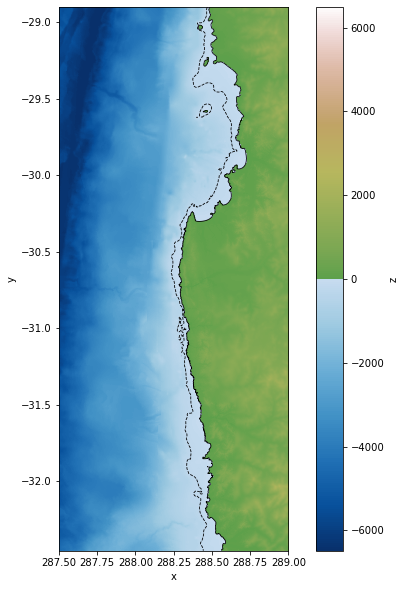

In [4]:
# ver contenidos (key) del archivo .mat
#por ejemplo para cargar variable 'bat': mat_data['bat']

for key in mat_data.keys():
    print(key,'\t',mat_data[key])

#separa en vectores x,y,z
x=mat_data['bat'][:,0]
y=mat_data['bat'][:,1]
z=mat_data['bat'][:,2]

#genera dataset desde vectores x, y, z
grd=xyz2grd(x,y,-z)

print()
print(grd) #muestra info

fig,ax1=plt.subplots(figsize=(10,10))
grd.z.plot.imshow(cmap=terreno,ax=ax1)
grd.z.plot.contour(levels=[-200,0], colors='k',linewidths=0.8,ax=ax1)

ax1.set_aspect('equal')
plt.grid()
plt.show()

savename=os.path.splitext(os.path.basename(mat_file))[0] #nombre de archivo es el mismo que el archivo mat original
grd.to_netcdf(os.path.join(savedir,savename+'.grd'),format='NETCDF3_CLASSIC') #guarda el arvhivo con formato grd

### Transforma todos los archivos. mat en una carpeta dada y los guarda como .grd en la misma carpeta

In [2]:
mat_dir=r'G:\My Drive\01 UTFSM\04 Memoria\06 HDD\Batimetrias\CIGIDEN-Batimetrias-v1\CIGIDEN-Batimetrias-v1'

#estas lineas muestran archivos .mat en la carpeta, solo para verificar contenidos
for file in os.listdir(mat_dir):
    if file.endswith(".mat"):
        print(file)

bat_l1_gebco_15sa_chilecont_v4_norte.mat


In [ ]:
for file in os.listdir(mat_dir):
    if file.endswith(".mat"):
        print(file)
        mat_data = loadmat(os.path.join(mat_dir,file))
        
        #separa en vectores x,y,z
        x=mat_data['bat'][:,0]
        y=mat_data['bat'][:,1]
        z=mat_data['bat'][:,2]
        
        grd=xyz2grd(x,y,-z)
        print(grd) #muestra info
        print()
        
        savedir=mat_dir
        savename=os.path.splitext(os.path.basename(file))[0] #nombre de archivo es el mismo que el archivo mat original
        grd.to_netcdf(os.path.join(savedir,savename+'.grd'),format='NETCDF3_CLASSIC') #guarda el arvhivo con formato grd

### Transforma todos los archivos .txt en una carpeta dada y los guarda como .grd en la misma carpeta

In [2]:
mat_dir=r'G:\My Drive\01 UTFSM\04 Memoria\06 HDD\Batimetrias\06-BatisSHOA-20200812T204418Z-001\06-BatisSHOA\DATA_UFSM'

#estas lineas muestran archivos .mat en la carpeta, solo para verificar contenidos
for file in os.listdir(mat_dir):
    if file.endswith(".txt"):
        print(file)

malla1s_San_Antonio.txt


In [2]:
#archivo .xyz es un archivo .txt con trs columnas: x, y, z
xyz_file=r"G:\My Drive\01 UTFSM\04 Memoria\06 HDD\Batimetrias\06-BatisSHOA-20200812T204418Z-001\06-BatisSHOA\DATA_UFSM\malla1s_San_Antonio.txt"

coords=[] # aqui se guardaran las coordenadas del archivo .xy
with open(xyz_file, 'r') as reader: # abre el archivo
    for line in reader.readlines(): # para cada linea, saltandose la primera
        line = line.replace('\n','') # quita saltos de linea
        #line = line.replace('  ','')
        line=line.rsplit(sep='\t') # Separa la linea en donde haya espacios
        coords.append(line) #agrega las coordenadas (texto a la lista coords)
        #print(line)

coords=np.array(coords) # transforma la lista a formato np.array
coords=coords.astype(np.float64) # pasa de sting a numero (float)

x=coords[:,0]
y=coords[:,1]
z=coords[:,2]

grd=xyz2grd(x,y,-z)
print(grd) #muestra info
print()

savedir=os.path.dirname(xyz_file)
savename=os.path.splitext(os.path.basename(xyz_file))[0] #nombre de archivo es el mismo que el archivo original
grd.to_netcdf(os.path.join(savedir,savename+'.grd'),format='NETCDF3_CLASSIC') #guarda el arvhivo con formato grd

<xarray.Dataset>
Dimensions:  (x: 237, y: 181)
Coordinates:
  * x        (x) float64 288.3 288.3 288.3 288.3 ... 288.4 288.4 288.4 288.4
  * y        (y) float64 -33.57 -33.57 -33.57 -33.57 ... -33.62 -33.62 -33.62
Data variables:
    z        (y, x) float64 -203.5 -192.0 -175.3 -158.9 ... 59.76 60.15 60.43

